![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [116]:
# Re-run this cell 
import pandas as pd

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head()

# Start coding here...
# Add as many cells as you like...

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7


In [117]:
# Count the number of columns in the dataframe
num_columns = len(schools.columns)
num_columns

7

In [118]:
schools.shape

(375, 7)

In [119]:
schools.info

<bound method DataFrame.info of                                            school_name  ... percent_tested
0    New Explorations into Science, Technology and ...  ...            NaN
1                                 Essex Street Academy  ...           78.9
2                         Lower Manhattan Arts Academy  ...           65.1
3      High School for Dual Language and Asian Studies  ...           95.9
4        Henry Street School for International Studies  ...           59.7
..                                                 ...  ...            ...
370  Queens High School for Information, Research, ...  ...           44.6
371  Rockaway Park High School for Environmental Su...  ...           38.5
372                   Channel View School for Research  ...           76.6
373                    Rockaway Collegiate High School  ...           46.5
374                                  Scholars' Academy  ...           99.2

[375 rows x 7 columns]>

In [120]:
# Define the cutoff score for best math schools
math_cutoff = 0.8 * 800  # 80% of 800

# Filter schools that meet the criteria
best_math_schools = schools[schools["average_math"] >= math_cutoff][["school_name", "average_math"]]

# Sort in descending order of average_math
best_math_schools = best_math_schools.sort_values(by="average_math", ascending=False)

# Display the results
best_math_schools.head()


,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683


In [121]:
# Calculate total_SAT per school
#schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Who are the top 10 performing schools?
#top_10_schools = schools.sort_values("total_SAT", ascending=False)[["school_name", "total_SAT"]].head(10)

#top_10_schools

In [122]:
# Calculate the total SAT score for each school
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

# Subsetting the relevant columns
top_10_schools = schools[["school_name", "total_SAT"]]

# Sort the schools by total_SAT in descending order and select the top 10
top_10_schools = top_10_schools.sort_values(by="total_SAT", ascending=False).head(10)

# Display the results
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


In [123]:
# Determining the borough with the largest standard deviation
# Grouping by borough and computing the statistics

borough_stats = schools.groupby("borough").agg(
num_schools=("total_SAT", "count"),
average_SAT=("total_SAT", "mean"),
std_SAT=("total_SAT", "std")).reset_index()

# Rounding of the values to 2 dp
borough_stats = borough_stats.round(2)

# Sort by standard deviation and take the first row
largest_std_dev = borough_stats.sort_values(by="std_SAT", ascending=False).head(1)

#Finding the borough with the largest standard deviation
#largest_std_dev = #borough_stats.loc[borough_stats["std_SAT"].idxmax()].to_frame().T

# Displaying the results
largest_std_dev


,borough,num_schools,average_SAT,std_SAT
2,Manhattan,89,1340.13,230.29


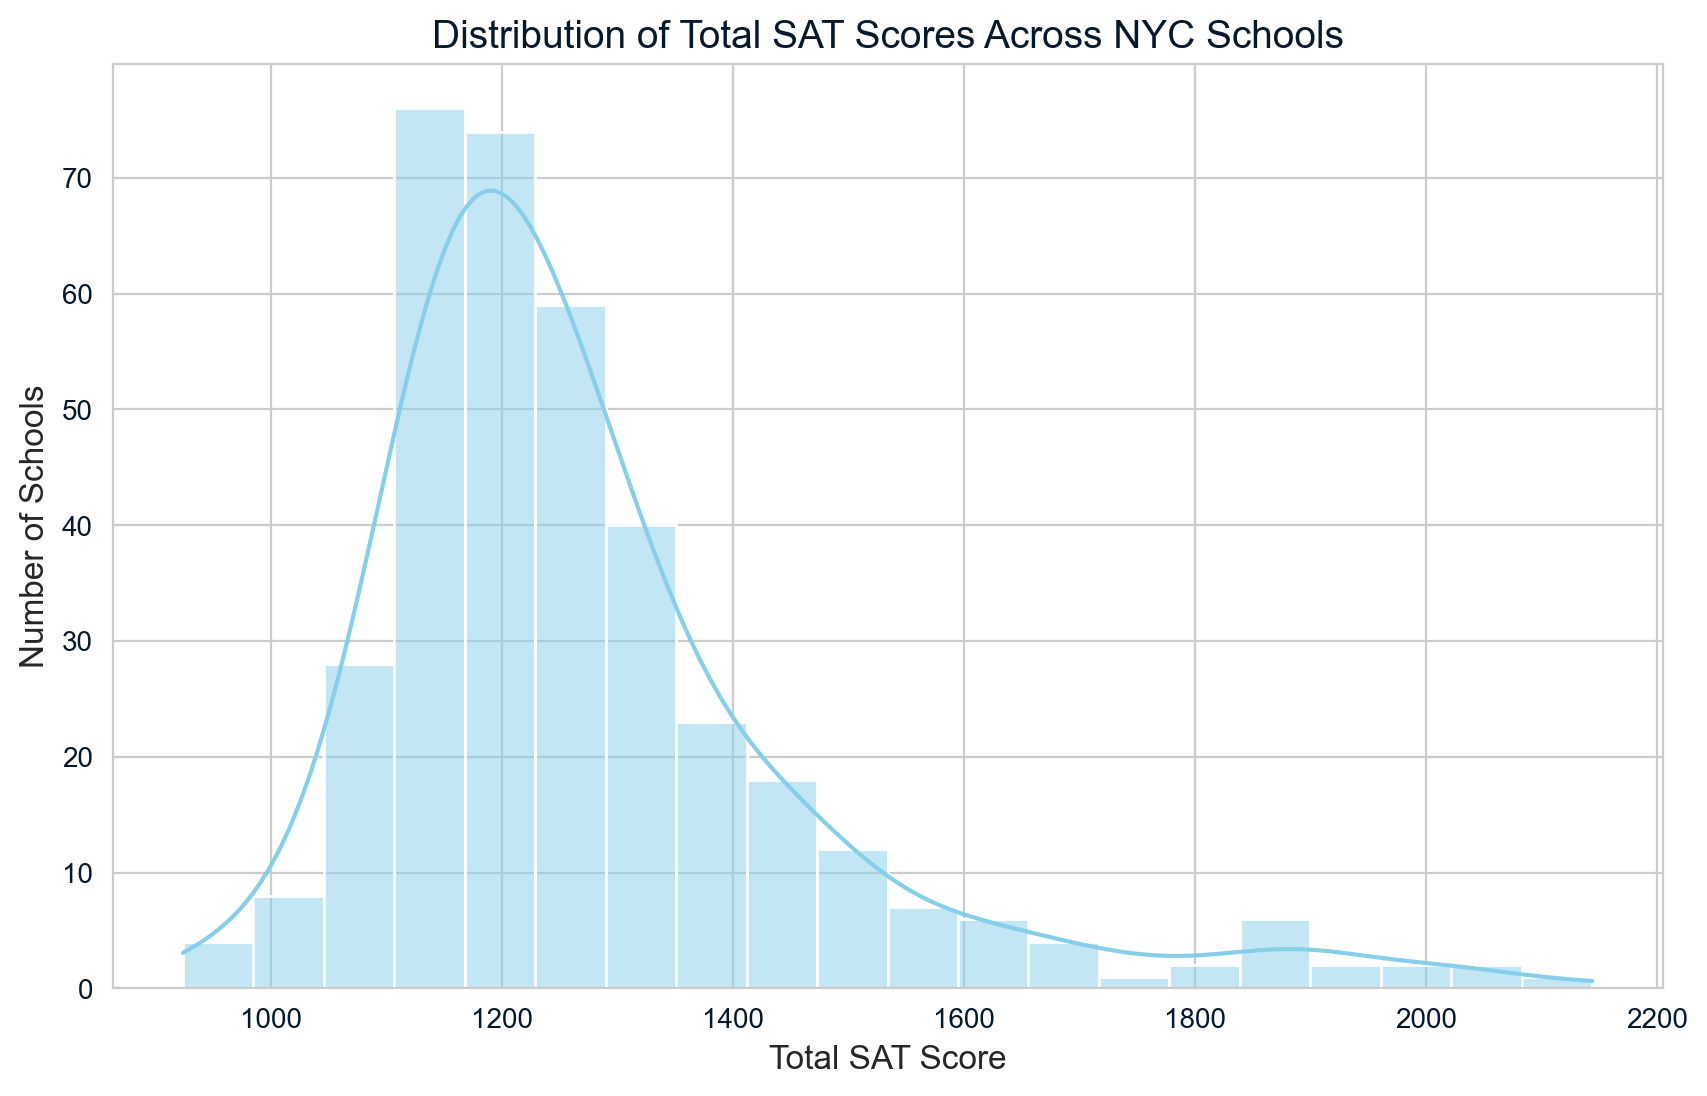

In [124]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(10,6))
sns.histplot(schools["total_SAT"], bins=20, kde=True, color="skyblue")

# Titles and labels
plt.title("Distribution of Total SAT Scores Across NYC Schools", fontsize=14)
plt.xlabel("Total SAT Score", fontsize=12)
plt.ylabel("Number of Schools", fontsize=12)

# Show plot
plt.show()


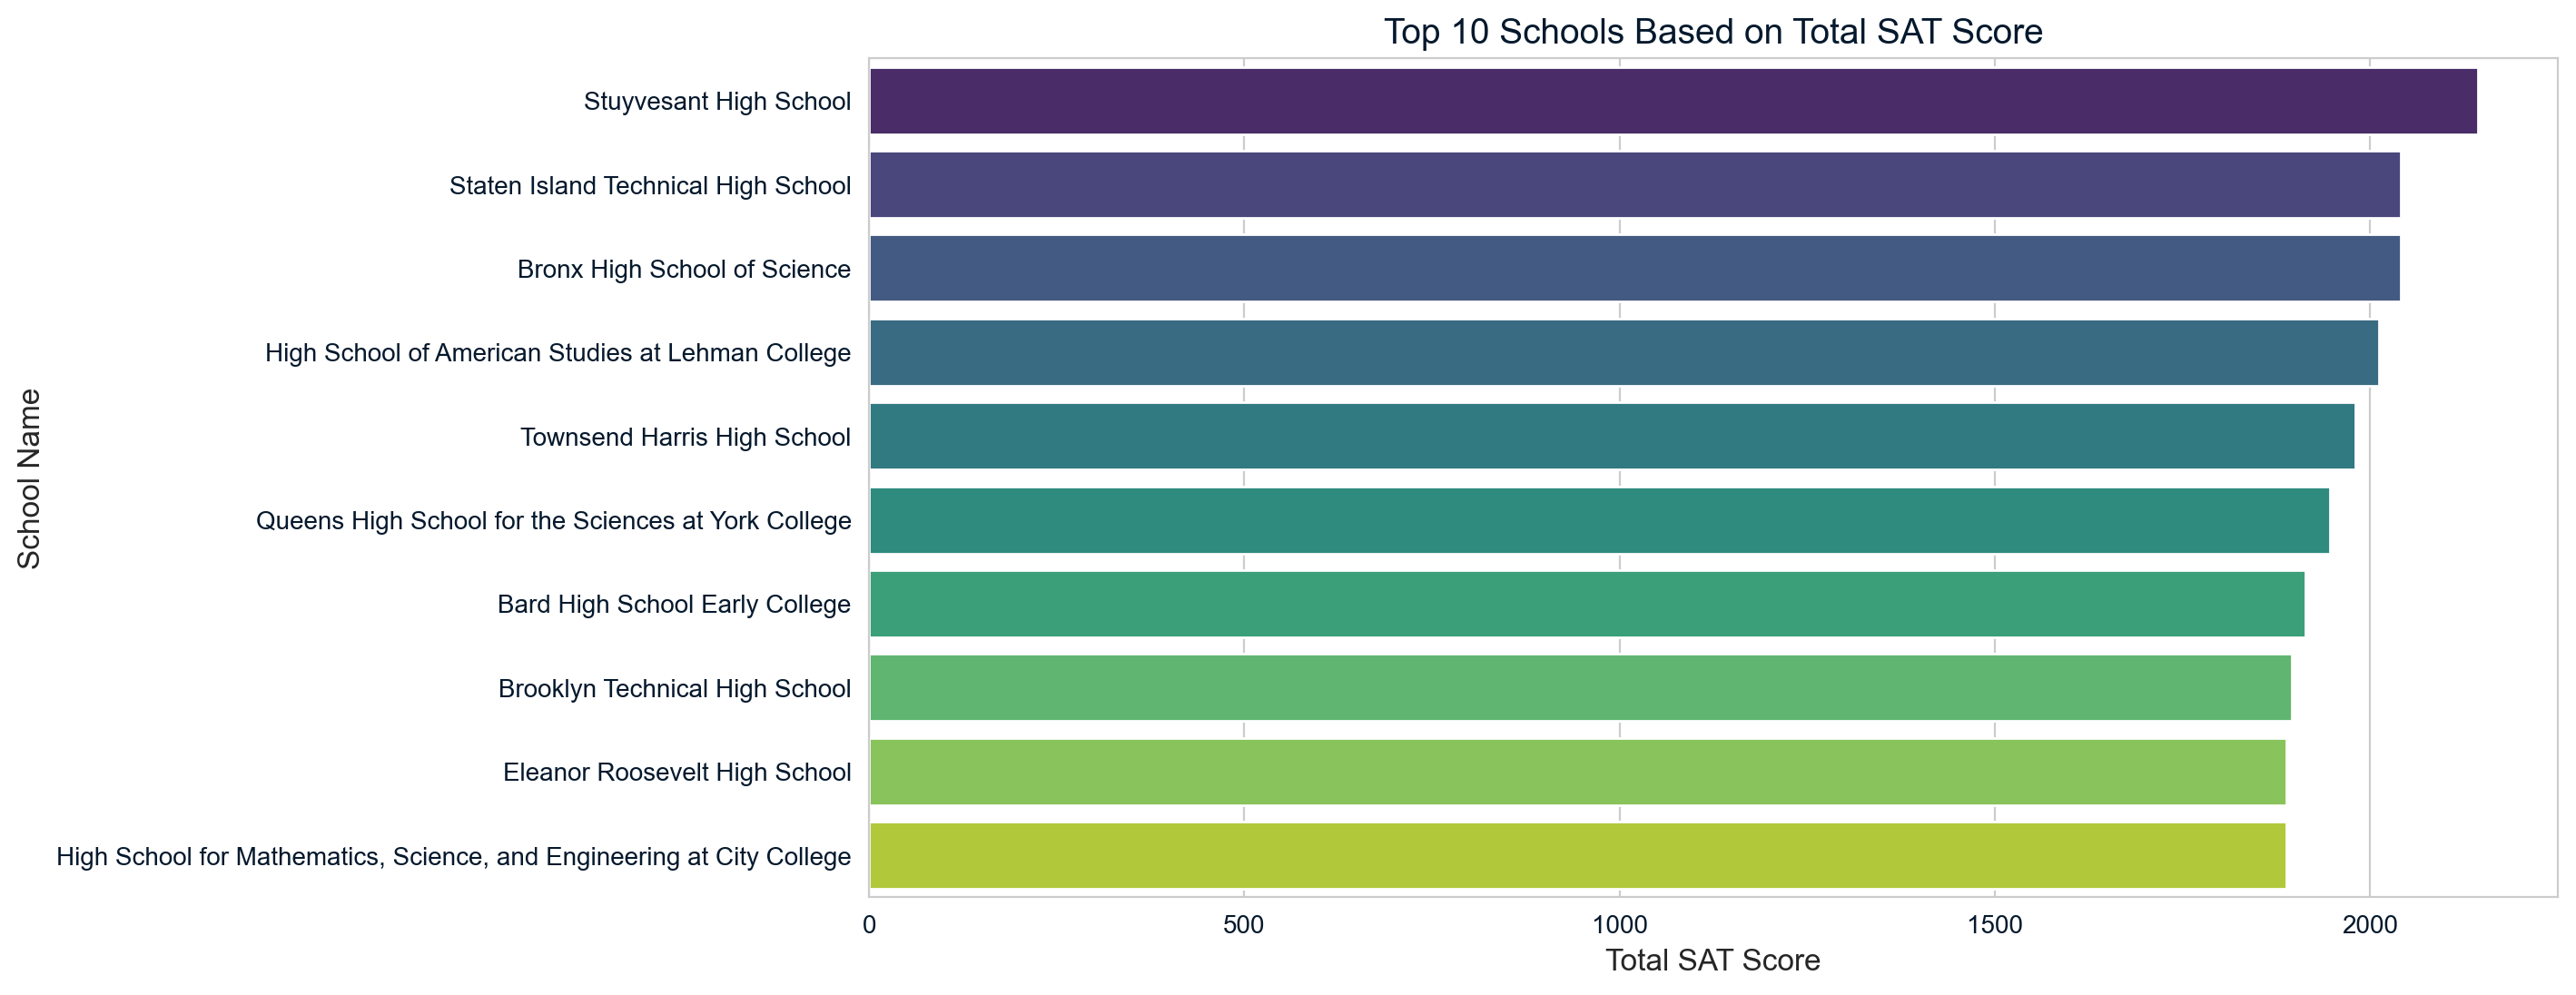

In [125]:
# Sort top 10 schools
top_10_schools = schools.nlargest(10, "total_SAT")

# Create bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="total_SAT", y="school_name", data=top_10_schools, palette="viridis")

# Titles and labels
plt.title("Top 10 Schools Based on Total SAT Score", fontsize=14)
plt.xlabel("Total SAT Score", fontsize=12)
plt.ylabel("School Name", fontsize=12)

# Show plot
plt.show()


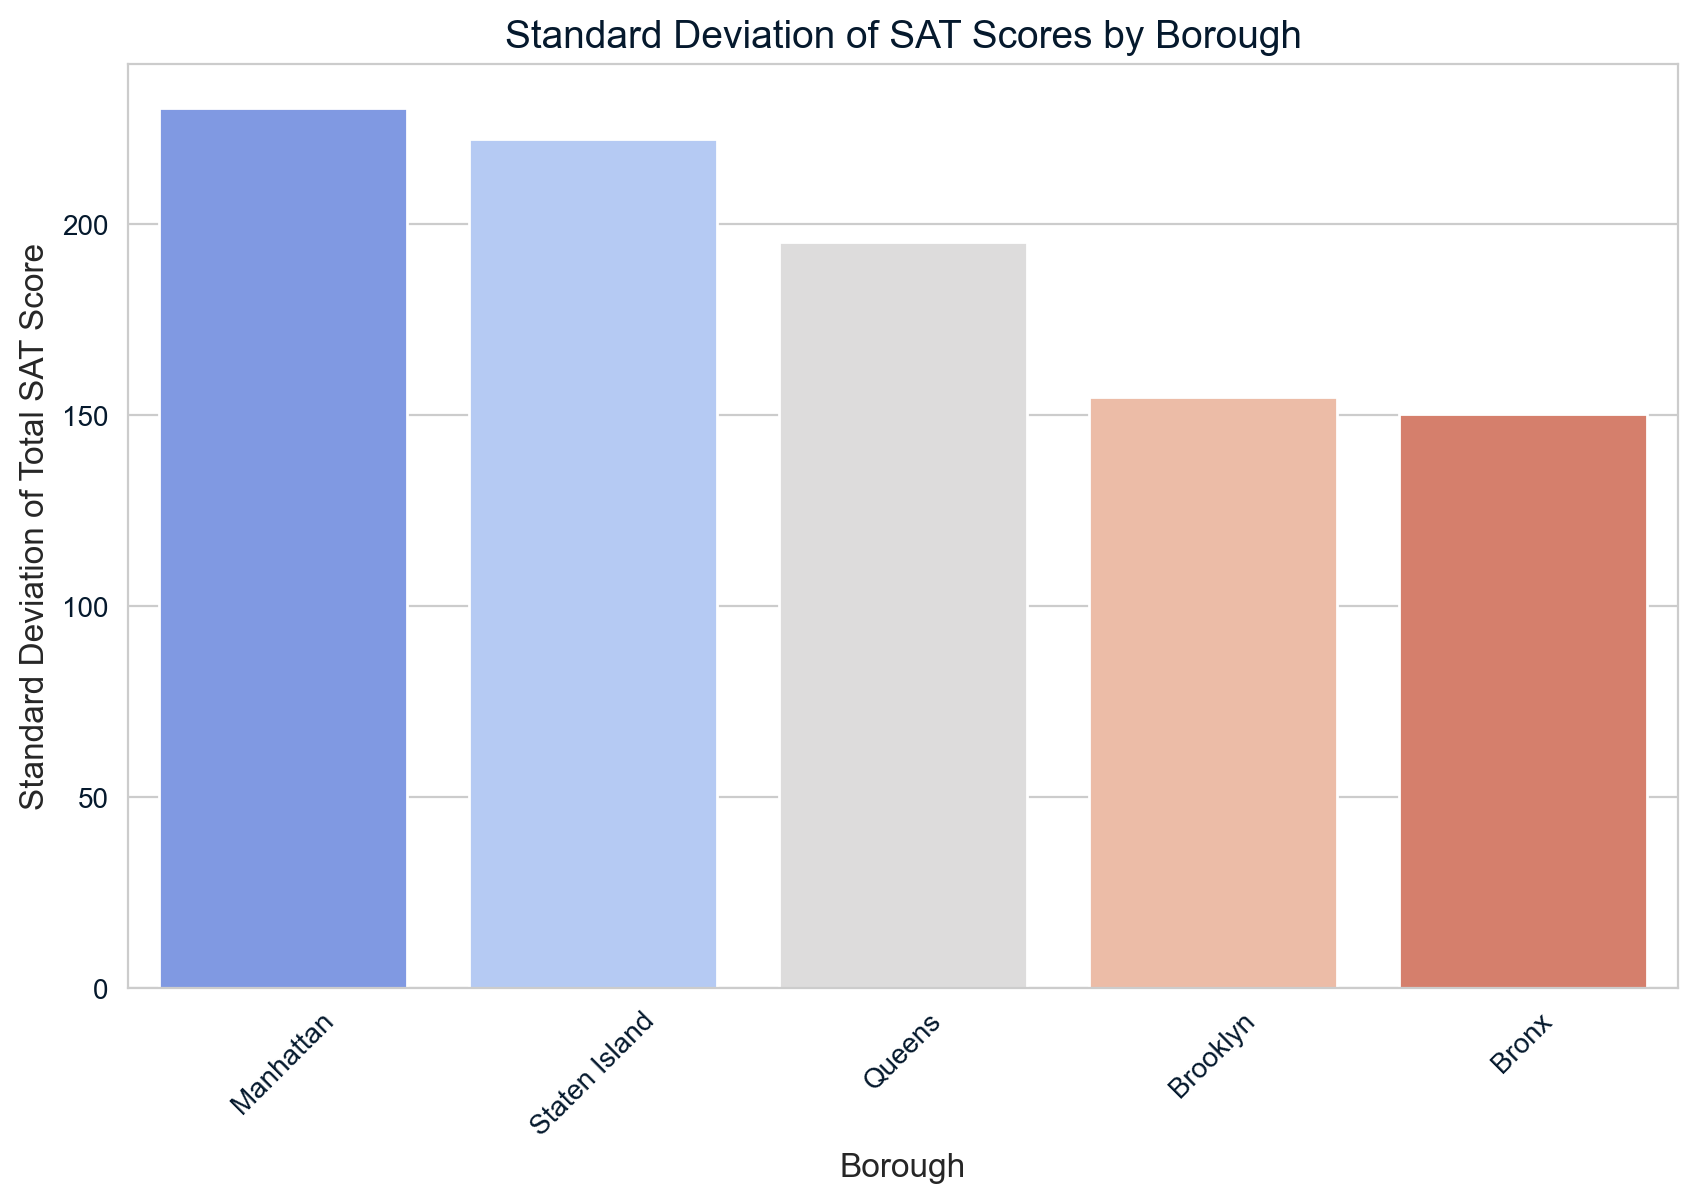

In [126]:
# Compute borough statistics
borough_stats = schools.groupby("borough").agg(
    std_SAT=("total_SAT", "std")
).reset_index()

# Sort for better visualization
borough_stats = borough_stats.sort_values(by="std_SAT", ascending=False)

# Create bar chart
plt.figure(figsize=(10,6))
sns.barplot(x="borough", y="std_SAT", data=borough_stats, palette="coolwarm")

# Titles and labels
plt.title("Standard Deviation of SAT Scores by Borough", fontsize=14)
plt.xlabel("Borough", fontsize=12)
plt.ylabel("Standard Deviation of Total SAT Score", fontsize=12)

# Show plot
plt.xticks(rotation=45)
plt.show()
